# Tutorial sinot Package

Welcome to the `sinot` tutorial. In this interactive tutorial, you will learn how to generate N-of-1 trials. The tutorial is created with version `0.1.0`. 

In this tutorial, you will learn, how to set parameters for you study, create a single patient, simulations a study with multiple and with dropout. 

Let's start with import the two main classes. `Trial` and `Patient`. While patient is simulating just one patient, you are able to simulate trials with multiple patients with Trial. 

In [1]:
from sinot.Simulation import Trial, Patient

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

## Simulate Outcome

In a first step, we are looking into the minimal set of parameters, which is just observing an outcome. The minimal dictonary consists of name, parameters for `x_0` and `noise`. `x_0` defines the starting point of the series and is drawn from a distribution. `noise` specify the time independet noise. By default, the distributions are normal specified with `mu` and `sigma`. Furthermore, you can specify a `baseline_drift`, `boarders` and `digits`. You can play around with the following example:

In [2]:
# Outcome parameters.
outcome_params = dict(
    name = "Outcome",   # Specifies the name
    x_0 = {"mu":10, "sigma":1},     # Specifies the start point
    baseline_drift={"mu": 0,"sigma":0.1},   # Specifies the baseline drift
    noise={"mu": 0,"sigma":0.1}, # Specifies Noise
    boarders=[0,20], # Cut off points
    digits=1 # Round
)

# Let's create a patient with these parameters
patient = Patient(outcome_params=outcome_params)
# We can already simulate the patient. As we do not have any 
# treatment sepcified, we are just in the baseline period, 
# which needs to be specified in the treatment_plan.
patient_df = patient.simulate(treatment_plan=["Baseline"]*10)
patient_df.head()

,Baseline_flag,Treatment,Outcome_baseline_drift,Outcome_underlying_state,Outcome
0,True,Baseline,10.496714,10.496714,10.5
1,True,Baseline,10.561483,10.561483,10.7
2,True,Baseline,10.538068,10.538068,10.5
3,True,Baseline,10.695989,10.695989,10.8
4,True,Baseline,10.649042,10.649042,10.7


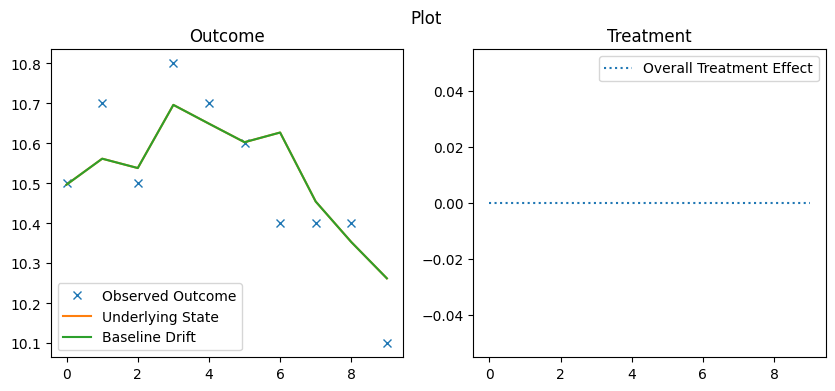

In [3]:
# you can also plot the data right from the patient object.
patient.plot()

As you can see, we have created a minimal data set with an outcome. As we do not have any other variables influencing the outcome, the `underlying_state` is the same as the `baseline_drift`. So let's add some exposures!

## Exposures

After we have seen, how to generate the outcome variable, we are looking into the specification for the exposure variables. To influence the outcome, we need to specify the effect from treatment on our outcome. There are two different ways, how you could define it:

1) Create a `dict` with the effect direction in the keys and specify the effect size in the values. 
2) Create a `dict` of `dict`s. 


The exposure can be specified with: 

- *gamma*: Specify the wash-in effect through exponential decay, default is set to 1.
- *tau*: Specify the wash-out effect through exponential decay, default is set to 1.
- *treatment_effect*: Specify the effect size of the treatment, default is set to 1.

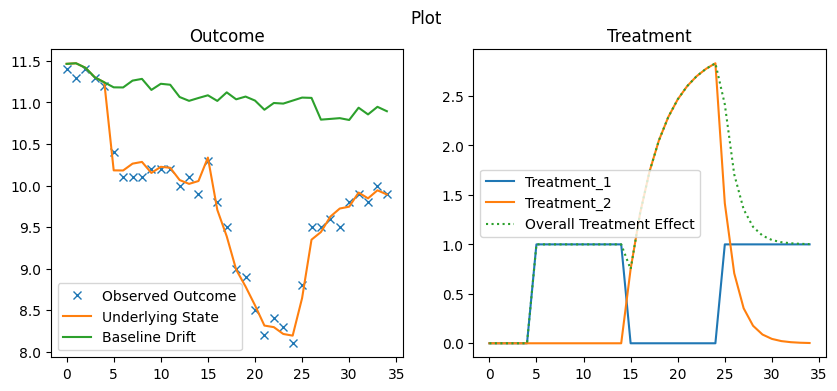

,Treatment_1_flag,Treatment_2_flag,Baseline_flag,Treatment,Treatment_1,Treatment_2,Outcome_baseline_drift,Outcome_underlying_state,Outcome
0,False,False,True,Baseline,0.0,0.0,11.465649,11.465649,11.4
1,False,False,True,Baseline,0.0,0.0,11.472402,11.472402,11.3
2,False,False,True,Baseline,0.0,0.0,11.417963,11.417963,11.4
3,False,False,True,Baseline,0.0,0.0,11.302864,11.302864,11.3
4,False,False,True,Baseline,0.0,0.0,11.242800,11.242800,11.2
5,True,False,False,Treatment_1,1.0,0.0,11.182629,10.182629,10.4
6,True,False,False,Treatment_1,1.0,0.0,11.181280,10.181280,10.1
7,True,False,False,Treatment_1,1.0,0.0,11.263534,10.263534,10.1
8,True,False,False,Treatment_1,1.0,0.0,11.284421,10.284421,10.1
9,True,False,False,Treatment_1,1.0,0.0,11.151602,10.151602,10.2


In [4]:
exposure_params = {
        'Treatment_1': {'treatment_effect': 1},
        'Treatment_2': {'gamma':2, 'tau': 4,'treatment_effect':3}
}

# Option 1
dependencies = {
    'Treatment_1 -> Outcome': -1,
    'Treatment_2 -> Outcome': -1}

# Option 2
dependencies = {
    'Outcome':{ "Treatment_1": -1,"Treatment_2": -1}
    }

treatment_plan = ["Baseline"]*5 + ["Treatment_1"]*10 + ["Treatment_2"]*10 + ["Treatment_1"]*10

patient = Patient(outcome_params=outcome_params, exposure_params=exposure_params, dependencies=dependencies)
patient_df = patient.simulate(treatment_plan=treatment_plan)
patient.plot()
patient_df.head(10)

> _Recommendation_: It is more elegant to set the `treatment_effect` in `exposure_params` to 1 and specify the treatment effect in the dependencies as the treatment_effect influences the effect on other variables as well. 

## Additional Variables

Variables can be specified within a variable params dictionary. It consists of names of the variable as keys and their parameters (`dict`) as values. You can specify the distributions or whether a variable should be constant over time (usefull in aggregated study if you want to model e.g. age). In our Example, we are creating the variable `Age` and `Steps_per_Day`. We specify `Age` as constant over the study period and drawn from a unit distribution between given boarders of 18 and 60. `Steps_per_Day` is defined as a normal distribution, which just can be positive (specified with the boarders of 0 and None) and rounded to no integers. In the dependencies, we specified, that Steps_per_Day is depending on the Age. 
> Please make sure, that you have the effect size in the right scale as the variables will not be normalized!

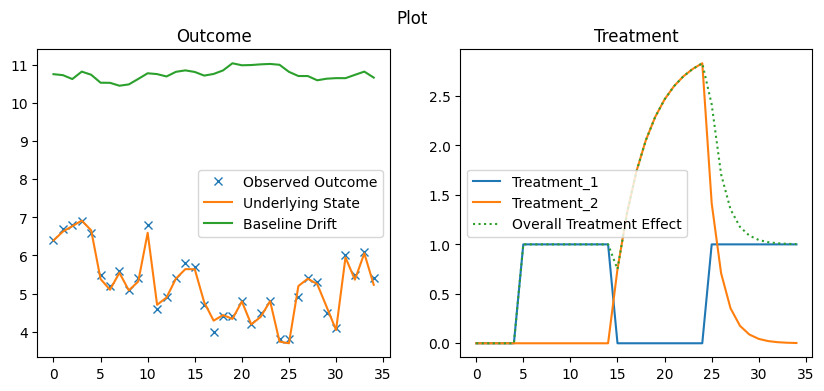

,Treatment_1_flag,Treatment_2_flag,Baseline_flag,Treatment,Age,Treatment_1,Treatment_2,Steps_per_Day,Outcome_baseline_drift,Outcome_underlying_state,Outcome
0,False,False,True,Baseline,47.0,0.0,0.0,4358.0,10.750786,6.392786,6.4
1,False,False,True,Baseline,47.0,0.0,0.0,4099.0,10.724967,6.625967,6.7
2,False,False,True,Baseline,47.0,0.0,0.0,3855.0,10.623060,6.768060,6.8
3,False,False,True,Baseline,47.0,0.0,0.0,3905.0,10.817572,6.912572,6.9
4,False,False,True,Baseline,47.0,0.0,0.0,4077.0,10.735836,6.658836,6.6
5,True,False,False,Treatment_1,47.0,1.0,0.0,4145.0,10.526676,5.381676,5.5
6,True,False,False,Treatment_1,47.0,1.0,0.0,4422.0,10.523939,5.101939,5.2
7,True,False,False,Treatment_1,47.0,1.0,0.0,3903.0,10.448106,5.545106,5.6
8,True,False,False,Treatment_1,47.0,1.0,0.0,4398.0,10.482596,5.084596,5.1
9,True,False,False,Treatment_1,47.0,1.0,0.0,4309.0,10.625948,5.316948,5.4


In [5]:
variable_params = {
    'Age': {"constant":True,"distribution":"unit", "boarders":[18,60]},
    'Steps_per_Day': {'distribution': 'normal', 'mu':5000, 'sigma':500, 'boarders':[0,None], 'digits':0}
}

# Option 2
dependencies = {
    'Steps_per_Day':{"Treatment_1":-100, "Treatment_2":-200, "Age":-10},
    'Outcome':{ "Treatment_1": -1,"Treatment_2": -1, "Steps_per_Day":-0.001}
    }

treatment_plan = ["Baseline"]*5 + ["Treatment_1"]*10 + ["Treatment_2"]*10 + ["Treatment_1"]*10

patient = Patient(
    outcome_params=outcome_params,
    exposure_params=exposure_params,
    variable_params=variable_params,
    dependencies=dependencies)
patient_df = patient.simulate(treatment_plan=treatment_plan)
patient.plot()
patient_df.head(10)

## Over time dependencies

You can specify time dependencies in the following way, which illustrates, that the Outcome is depending on the last two days of Steps per day. In the list, the effect size are written. The first element is with lag of 1, the second with lag of 2 and so on. 

In [6]:
over_time_dependencies={
    'Outcome':{"Steps_per_Day":[-0.0001, -0.00005]}
}

## Create Study

After we have looked into all parameters, we can also create a N-of-1 study with multiple patients. In addition, we can add dropout as parameter.

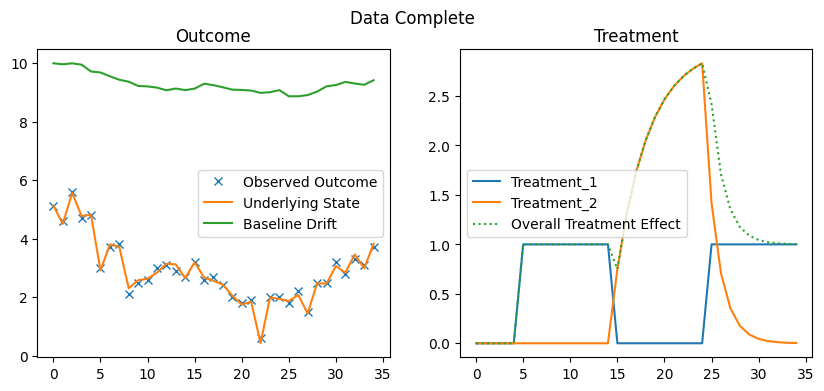

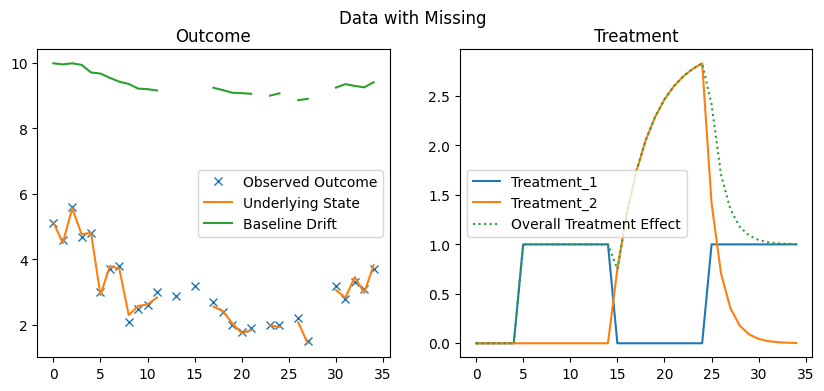

In [7]:
trial = Trial(outcome_params=outcome_params,
    exposure_params=exposure_params,
    variable_params=variable_params,
    dependencies=dependencies,
    over_time_dependencies=over_time_dependencies)

dropout_params = {
    'kind':"MAR",
    'fraction':0.8
}

data_complete, data_dropout = trial.simulate_nof1_study(treatment_plan=treatment_plan, nb_patients=10, dropout_params=dropout_params)

trial.plot_data(data_complete, title="Data Complete")
trial.plot_data(data_dropout, title="Data with Missing")

In [8]:
# As all parameters are dictonaries, you can easily save an load the data as json or YAML
import yaml

study_params = dict(
    outcome_params=outcome_params,
    exposure_params=exposure_params,
    variable_params=variable_params,
    dependencies=dependencies,
    over_time_dependencies=over_time_dependencies
)

with open('study_parameters.yaml', 'w+') as ff:
    yaml.dump(study_params, ff)

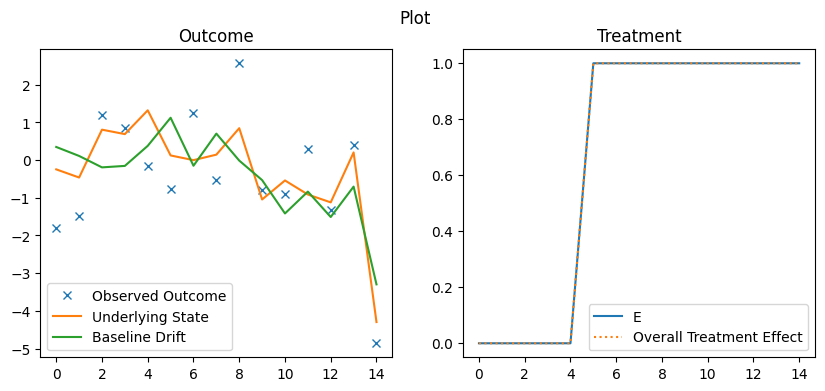

In [14]:
from sinot.create_study_params import create_study_params

study_params = create_study_params("parameter/dagitty_example.txt")
pat = Patient(**study_params)
pat.simulate(treatment_plan=["Baseline"]*5+["E"]*10)
pat.plot()